
# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

<center>
<img 
     src="http://www2.famaf.unc.edu.ar/~efernandez/egeo/img/logos/famaf.jpg" 
     alt="Drawing" 
     style="width:30%;"
/>
</center>

### Universidad Nacional de Córdoba
---

## Practico
### Introduccion al Aprendizaje Automatico


Grupo 2: Luciano Mantovani, Juan Ignacio Barrionuevo Galtier, Antonela Sambuceti

## 1. Preparación del conjunto de datos

### Importacion de librerias

In [43]:
import pyarrow
import fastparquet
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import Normalizer 
from sklearn.tree import plot_tree

In [22]:
df = pd.read_parquet("df_supervisado_agrupado.parquet")

In [23]:
df

,dni_titular_movimiento,anio_mes_cupon,client__edad,client__antig,client__x0_Hombre,client__x0_Mujer,client__x0_Sin Datos,client__x1_Sector_Educativo,client__x1_Sector_Empleado_Comercio,client__x1_Sector_Financiero,...,trans__x3_1,trans__x3_2,trans__x3_3,trans__x3_4,trans__x3_5,trans__x3_6,trans__x3_7,trans__x3_8,trans__x3_9,monto_ajustado
0,000000b5aea2c9ea7cc155f6ebcef97f826,202008.0,46.0,225.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.72
1,000000b5aea2c9ea7cc155f6ebcef97f826,202009.0,47.0,226.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.61
2,000000b5aea2c9ea7cc155f6ebcef97f826,202010.0,47.0,227.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.46
3,000000b5aea2c9ea7cc155f6ebcef97f826,202011.0,47.0,228.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.34
4,000000b5aea2c9ea7cc155f6ebcef97f826,202012.0,47.0,229.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,000f0b73ebfa002a79a0642b82e87919904,202101.0,64.0,21.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11616.45
7406,000f0b73ebfa002a79a0642b82e87919904,202102.0,64.0,22.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12566.68
7407,000f0b73ebfa002a79a0642b82e87919904,202103.0,64.0,23.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2663.08
7408,000f0b73ebfa002a79a0642b82e87919904,202104.0,64.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4685.64


In [24]:
df.shape

(7410, 55)

In [25]:
df.columns

Index(['dni_titular_movimiento', 'anio_mes_cupon', 'client__edad',
       'client__antig', 'client__x0_Hombre', 'client__x0_Mujer',
       'client__x0_Sin Datos', 'client__x1_Sector_Educativo',
       'client__x1_Sector_Empleado_Comercio', 'client__x1_Sector_Financiero',
       'client__x1_Sector_No_Operativo', 'client__x1_Sector_Operativo',
       'client__x1_Sector_Salud', 'client__x1_Sector_Seguridad',
       'client__x1_Sector_Sin_Datos', 'client__x2_Casado', 'client__x2_Otros',
       'client__x2_Sin_datos', 'client__x2_Soltero', 'client__x3_REGION_CUYO',
       'client__x3_REGION_NORDESTE', 'client__x3_REGION_NOROESTE',
       'client__x3_REGION_PAMPEANA', 'client__x3_REGION_PATAGONIA',
       'client__x3_SIN_DATOS', 'trans__x0_AX', 'trans__x0_EX', 'trans__x0_MC',
       'trans__x0_PC', 'trans__x0_PL', 'trans__x0_PN', 'trans__x0_PP',
       'trans__x0_TA', 'trans__x0_VI', 'trans__x0_ZE',
       'trans__x1_American_express', 'trans__x1_Clasica',
       'trans__x1_Master_internacio

### 1.1 Creación de variable categórica 

Creamos una columna para utilizar en los modelos de clasificación, que indica si un cliente ha aumentado su consumo personal mes a mes. El mes inicial para cada cliente se inicializa en 0.

Cabe destacar que a la hora de agrupar los movimientos en cada mes, se considera la fecha de cierre de la tarjeta, por lo cual cada mes comprende desde el dia 25 del mes anterior hasta el dia 24 del corriente, inclusive. 

In [26]:
df_dni_mes_mon = df[['dni_titular_movimiento', 'anio_mes_cupon','monto_ajustado']] \
                        .groupby(['dni_titular_movimiento', 'anio_mes_cupon']).sum('monto_ajustado') \
                        .reset_index() \
                        .sort_values(by=['dni_titular_movimiento', 'anio_mes_cupon'])
df_dni_mes_mon

,dni_titular_movimiento,anio_mes_cupon,monto_ajustado
0,000000b5aea2c9ea7cc155f6ebcef97f826,202008.0,-4.72
1,000000b5aea2c9ea7cc155f6ebcef97f826,202009.0,-4.61
2,000000b5aea2c9ea7cc155f6ebcef97f826,202010.0,-4.46
3,000000b5aea2c9ea7cc155f6ebcef97f826,202011.0,-4.34
4,000000b5aea2c9ea7cc155f6ebcef97f826,202012.0,-4.21
...,...,...,...
7405,000f0b73ebfa002a79a0642b82e87919904,202101.0,11616.45
7406,000f0b73ebfa002a79a0642b82e87919904,202102.0,12566.68
7407,000f0b73ebfa002a79a0642b82e87919904,202103.0,2663.08
7408,000f0b73ebfa002a79a0642b82e87919904,202104.0,4685.64


In [27]:
# Agregación de la nueva columna seteada en 0.
# En la iteración, se le cambia el valor a 1 en caso de que cumpla con las condiciones preestablecidas.

df_dni_mes_mon['fg_aumentado'] = 0
for i in range(1,len(df_dni_mes_mon)):
    if (df_dni_mes_mon.iloc[i]['dni_titular_movimiento'] == df_dni_mes_mon.iloc[i-1]['dni_titular_movimiento']) \
        & (df_dni_mes_mon.iloc[i]['anio_mes_cupon'] > df_dni_mes_mon.iloc[i-1]['anio_mes_cupon']):
            var_mes = df_dni_mes_mon.iloc[i]['monto_ajustado'] - df_dni_mes_mon.iloc[i-1]['monto_ajustado']
            if (var_mes > (abs(df_dni_mes_mon.iloc[i-1]['monto_ajustado'])*0.1)):
                    df_dni_mes_mon.iloc[i,3] = 1

In [28]:
df_dni_mes_mon.head(20)

,dni_titular_movimiento,anio_mes_cupon,monto_ajustado,fg_aumentado
0,000000b5aea2c9ea7cc155f6ebcef97f826,202008.0,-4.72,0
1,000000b5aea2c9ea7cc155f6ebcef97f826,202009.0,-4.61,0
2,000000b5aea2c9ea7cc155f6ebcef97f826,202010.0,-4.46,0
3,000000b5aea2c9ea7cc155f6ebcef97f826,202011.0,-4.34,0
4,000000b5aea2c9ea7cc155f6ebcef97f826,202012.0,-4.21,0
5,000000b5aea2c9ea7cc155f6ebcef97f826,202101.0,-4.08,0
6,000000b5aea2c9ea7cc155f6ebcef97f826,202102.0,-3.97,0
7,000000b5aea2c9ea7cc155f6ebcef97f826,202103.0,-3.83,0
8,000000b5aea2c9ea7cc155f6ebcef97f826,202104.0,-3.72,0
9,000000b5aea2c9ea7cc155f6ebcef97f826,202105.0,-3.64,0


In [29]:
df_dni_mes_mon = df_dni_mes_mon.drop(columns=['monto_ajustado'])

In [30]:
df_dni_mes_mon = df_dni_mes_mon.rename(columns={'dni_titular_movimiento': 'dni_titular_movimiento_c', 'anio_mes_cupon': 'anio_mes_cupon_c'})
df_dni_mes_mon

,dni_titular_movimiento_c,anio_mes_cupon_c,fg_aumentado
0,000000b5aea2c9ea7cc155f6ebcef97f826,202008.0,0
1,000000b5aea2c9ea7cc155f6ebcef97f826,202009.0,0
2,000000b5aea2c9ea7cc155f6ebcef97f826,202010.0,0
3,000000b5aea2c9ea7cc155f6ebcef97f826,202011.0,0
4,000000b5aea2c9ea7cc155f6ebcef97f826,202012.0,0
...,...,...,...
7405,000f0b73ebfa002a79a0642b82e87919904,202101.0,1
7406,000f0b73ebfa002a79a0642b82e87919904,202102.0,0
7407,000f0b73ebfa002a79a0642b82e87919904,202103.0,0
7408,000f0b73ebfa002a79a0642b82e87919904,202104.0,1


In [31]:
df = df.merge( df_dni_mes_mon, 
             left_on=['dni_titular_movimiento', 'anio_mes_cupon'], 
             right_on=['dni_titular_movimiento_c', 'anio_mes_cupon_c']) \
        .drop(columns= ['dni_titular_movimiento_c','anio_mes_cupon_c'])

In [32]:
df.shape

### Creación de variable mes ordinal

Creamos una variable ordinal usando los valores de anio_mes_cupon para solucionar el problema numerico que representa el formato año-mes en la variable. Si bien es mas entendible, representa un problema para entrenar los modelos, ya que le asigna un peso mayor al año que al mes. De esta manera, todos los meses tienen la misma importancia.

In [71]:
df['o_mes'] = df.anio_mes_cupon.astype('category').cat.codes

### 1.3 Correlación entre las variables

In [63]:
corr = df.corr().round(2)
corr=corr[['monto_ajustado']]
corr.loc[:,'abs_corr']=np.abs(corr['monto_ajustado'])
corr.sort_values(by='abs_corr',ascending = False).style.background_gradient()

,monto_ajustado,abs_corr
monto_ajustado,1.000000,1.000000
trans__x1_Naranja,0.620000,0.620000
trans__x0_PL,0.560000,0.560000
trans__x2_Pesos,0.510000,0.510000
trans__x2_Zeta,0.500000,0.500000
trans__x3_1,0.420000,0.420000
fg_aumentado,0.390000,0.390000
trans__x0_ZE,0.370000,0.370000
trans__x3_9,0.290000,0.290000
trans__x3_0,0.280000,0.280000


En el cuadro anterior, vemos la correlación de las columnas con respecto a monto_ajustado. Podemos ver que el producto 'Plan Largo' y el tipo_producto 'Naranja' estan fuertemente correlacionados con monto_ajustado. Esto es de esperar ya que concentran la mayoria de los casos.

### Correlacion entre todas las variables numericas

En la siguiente figura, ilustramos el mapa de calor para visualizar la correlacion de todas las variables y encontrar aquellas columnas que nos aporten informacion redundante, las cuales habria que descartar a la hora de instanciar los modelos.

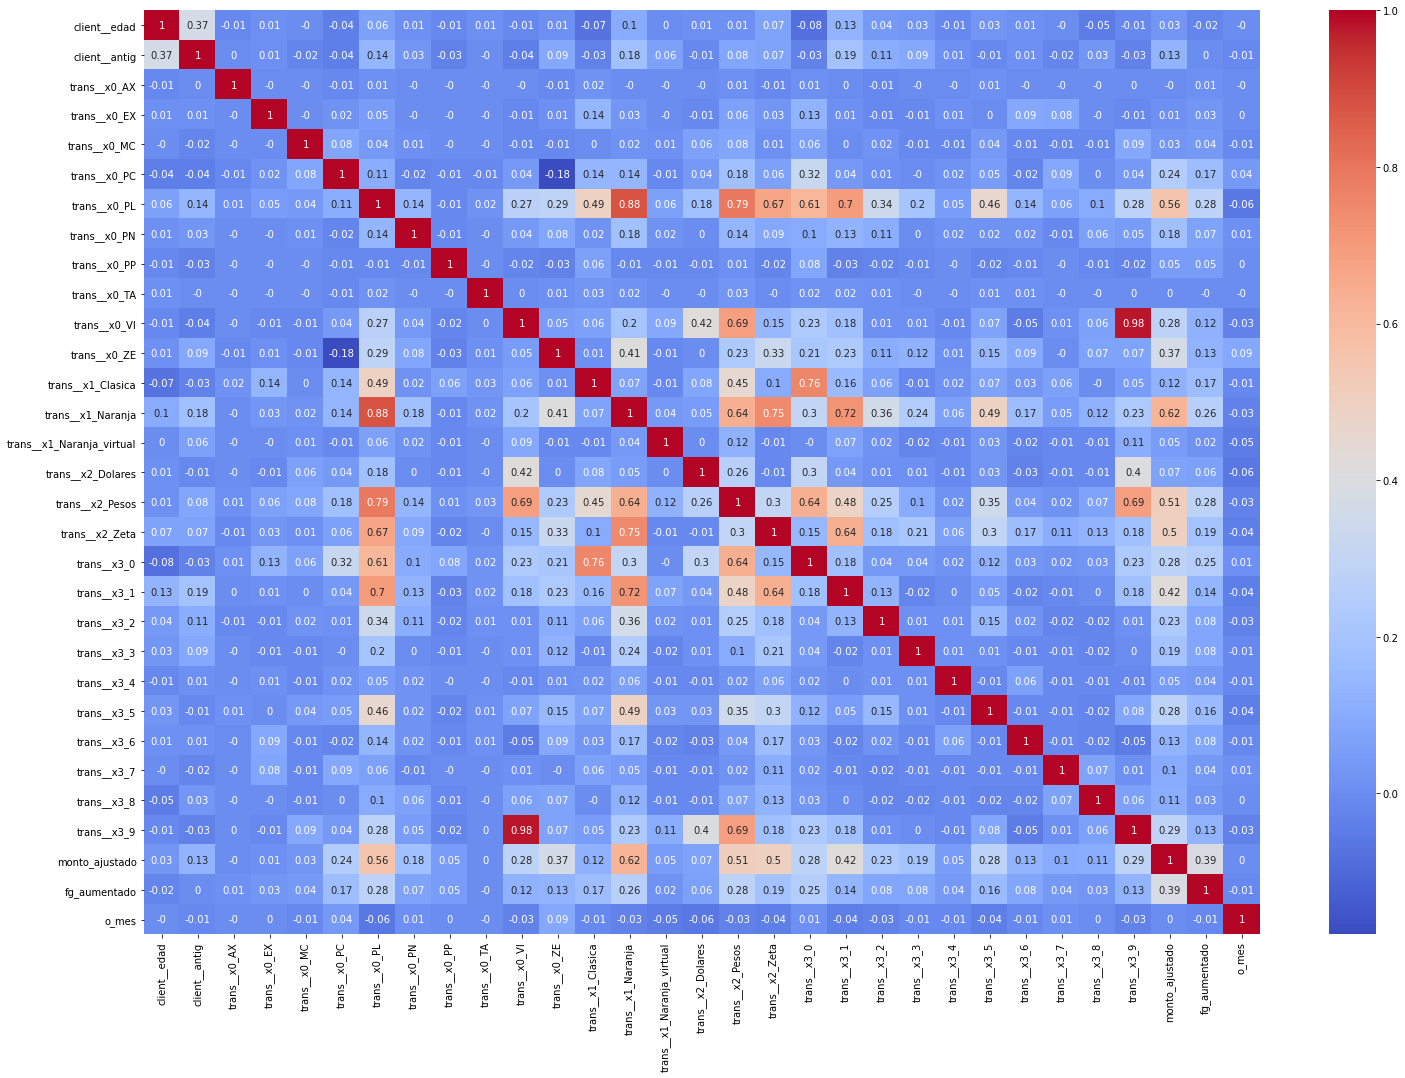

In [65]:
cols = [x for x in df.columns if 'client__x' not in x]
cols.remove('dni_titular_movimiento')
cols.remove('anio_mes_cupon')

plt.figure(figsize=(25,17))
corr = df[cols].corr().round(2)
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot=True, cmap= 'coolwarm')
plt.show()

La variables que consideramos descartar son aquellas que tienen una relacion fuerte con otra pero dentro del mismo concepto. Es decir, si un producto naranja se relaciona fuertemente con un tipo_producto, es probable que expliquen lo mismo. 

Por una cuestion de conservar la integridad de los datos, decidimos mantener la categoria 'producto_naranja' por sobre 'tipo_producto_movimiento'. Es decir que, en aquellos casos donde exista una correlacion fuerte entre un producto y un tipo_producto, optamos por eliminar el tipo_producto.

Columnas a eliminar:
- **trans__x1_Visa_internacional**: Tiene una correlacion lineal cercana a 1 con trans__x0_VI (producto VISA).
- **trans__x1_Master_internacional**: Tiene una correlacion lineal cercana a 1 con trans__x0_MC (producto MC).
- **trans__x1_American_express**: Tiene una correlacion lineal cercana a 1 con trans__x0_AX (producto AX).

In [46]:
df = df.drop(['trans__x1_Visa_internacional', 'trans__x1_Master_internacional', 'trans__x1_American_express'], axis=1)

KeyError: "['trans__x1_Visa_internacional' 'trans__x1_Master_internacional'\n 'trans__x1_American_express'] not found in axis"

In [47]:
df.shape

(7410, 53)

### Distribución de features numericas con respecto al target, monto_ajustado

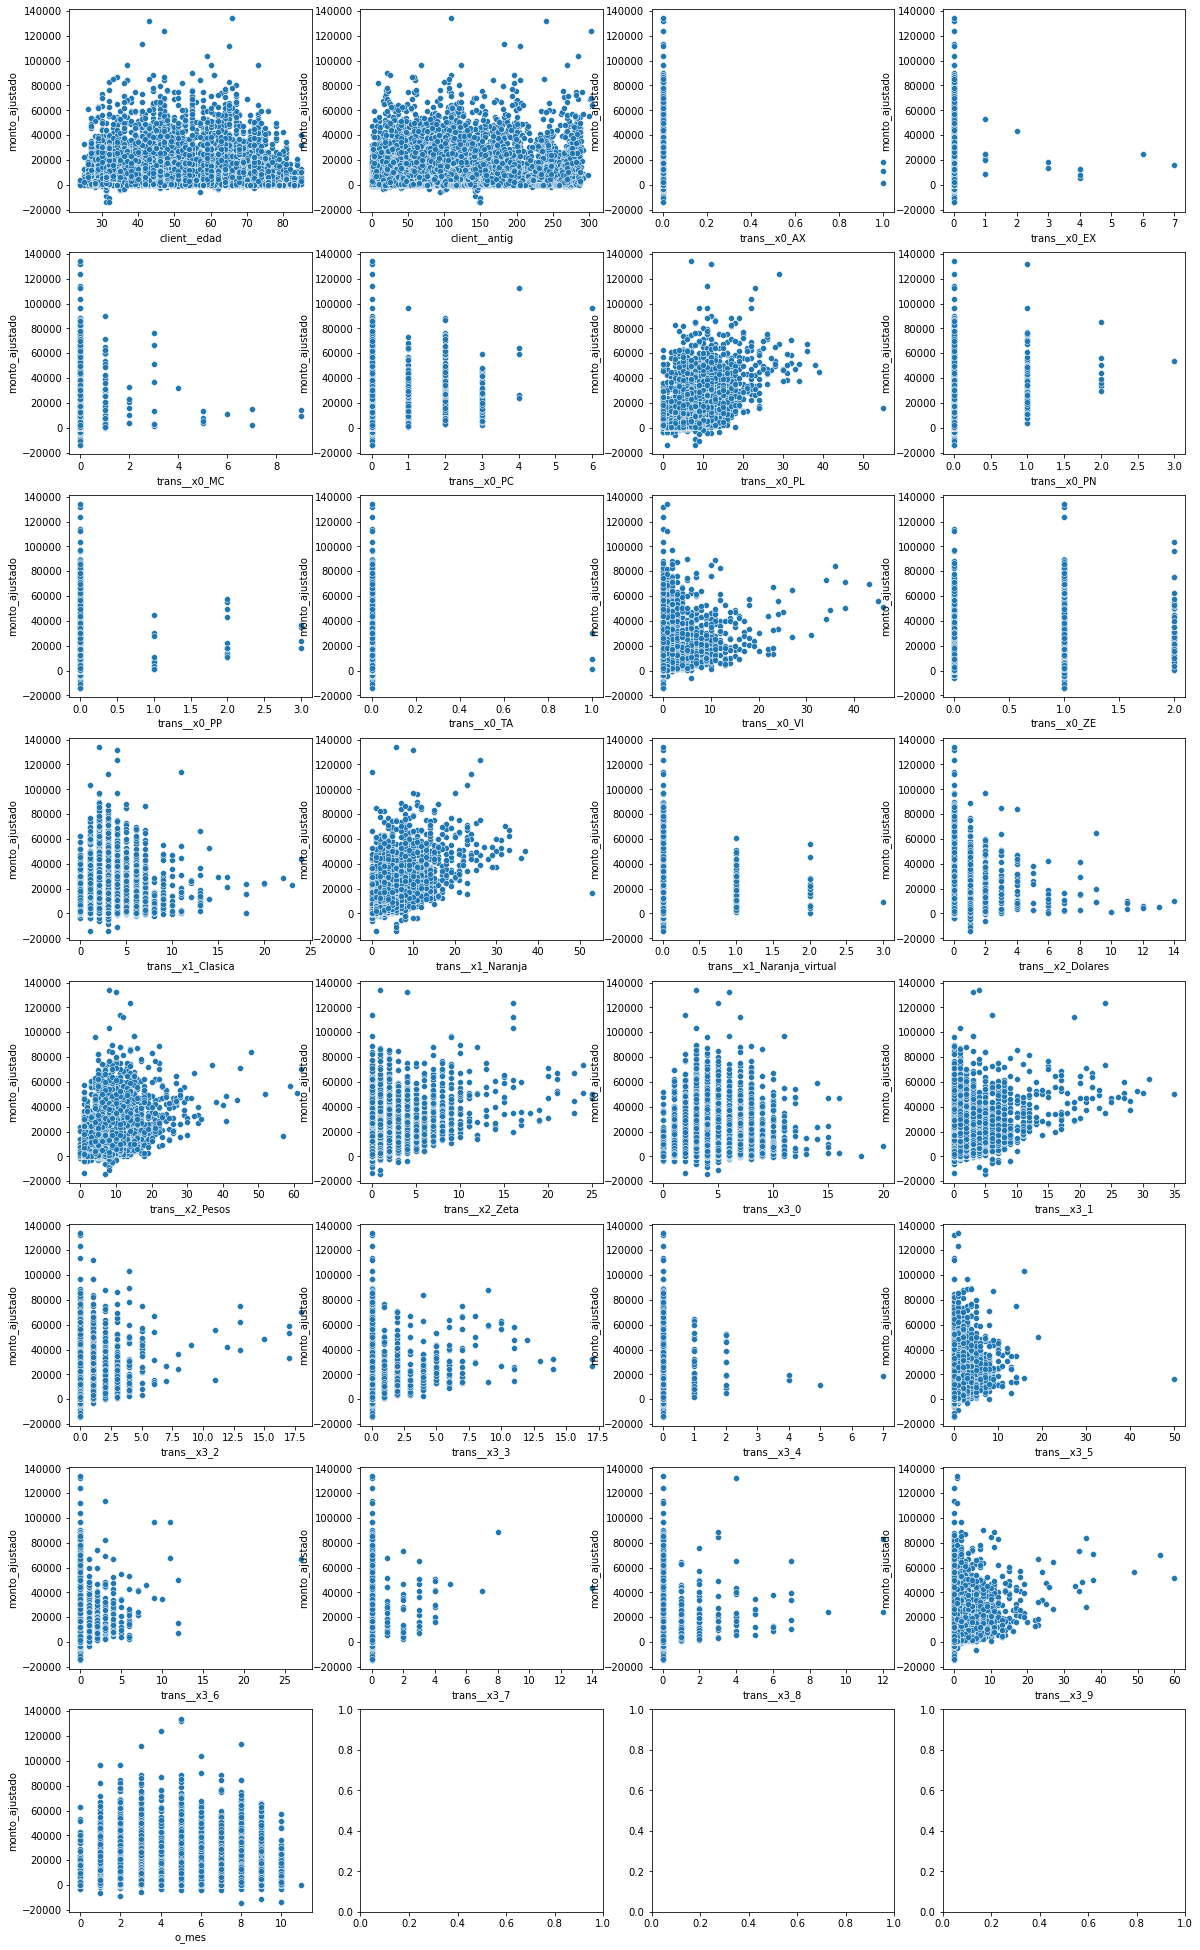

In [70]:
# Visualizamos solo las numericas y las transaccionales sumarizadas
cols = [x for x in df.columns.values if 'client__x' not in x]
cols.remove('dni_titular_movimiento')
cols.remove('anio_mes_cupon')
cols.remove('monto_ajustado')
cols.remove('fg_aumentado')


# plot
n_cols = 4
n_rows = math.ceil(len(cols)/n_cols)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 35))
count = 0
for i in cols:    
    row = math.floor(count / n_cols)
    col = count % n_cols
    ax = axs[row, col]
    sns.scatterplot(data=df, x=i, y='monto_ajustado', ax=ax)
    count =count +1

plt.show()

Analisis de distribucion de monto_ajustado con respecto a los features numericos

**client_edad**: No se distribuye de manera lineal. Sobre el contorno del grupo de puntos se podria dibujar una recta con pendiente hacia arriba en los consumos para clientes de menos de 40 años, mientras que para los clientes de mas de 60 se observa una pendiente hacia abajo pero menos pronunciada en los consumos. Y entre estos umbrales, los montos se mantienen dentro del rango 0-60000 aprox. Esto podria interpretarse en que hay ciertas franjas de edad con consumo mas estable que otras, y que es mayor el crecimiento en relacion gasto-edad en jovenes que el descenso en adultos mayores. Ademas en el rango de edad de 40-70, el nivel de consumo es mas estable. 

**client_antig**: Sobre esta relacion se puede decir que se puede observar cierta uniformidad en la distribucion, sin embargo existe un rango de antiguedad que podriamos limitar entre 200 y 280 aproximadamente, donde el rango de montos disminuye en comparacion con el resto de la distribucion. Esto nos puede indicar que existe un grupo de clientes que tuvo menos gastos con ese rango de antiguedades. Habra sesgo?

**Productos AX, EX, MC, PC, PN, PP, TA**: No hay muchos datos para estas categorias. Se distribuyen de forma parecida, con concentracion en 0 dado que la mayoria de los clientes no consume estos productos. Se puede ver de todas formas, una tendencia a haber menor consumo para los clientes que mas ocurrencias tienen. Esto ultimo quizas no aplica para PC, donde se puede observar una fluctuacion mayor en el nivel de los montos.

**Producto PL**: La distribucion parece ser uniforme para el rango entre 0 y 20 de cantidad de consumos en PL. Normalmente los productos en PL son para 6, 12 o 18 cuotas, por lo que es normal que haya mas frecuencia en la aparición de este producto.

**Producto VI**: Se puede obsevar una concentracion cercana al 0 para esta variable, y una disminución tanto en montos como en casos a medida que aumentan los casos de VI, aunque con cierta dispersión. 

**Producto ZE**: Observando el grafico podemos estimar que existe una cantidad parecida de transacciones para 0 o 1 consumo mensual, y disminuye para 2. Es necesario considerar que dentro de este mismo analisis se incluye la relacion de monto con moneda de tipo ZE, que debería tener relacion con esta variable aunque los graficos difieran. 

El scatterplot de features categoricos nos brinda unicamente informacion sobre la concentracion de casos en cada categoria, pero no podriamos con eso solo proyectar el comportamiento de las regresiones para la prediccion de los montos. 

### 1.4 Normalización de las variables

Para los modelos de regresión polinomial, puede ser necesario un escalado de los datos previo al entrenamiento, ya que la variable 'monto_ajustado' varía en rangos más altos que las variables explicativas (variables X's). 

Por otro lado, para aquellos modelos de clasificación, probaremos por un lado la normalización de tipo L1 que permite eliminar la influencia de los valores atípicos, y por otro lado L2 que permite aumentar la distancia entre los diferentes puntos a clasificar, y de esta forma permite encontrar de manera más eficiente el hiperplano de separación. 

## 2. División del conjunto de datos

Debido a que nuestros datos se encuentran ordenados temporalmente, no consideramos pertinente hacer una mezcla aleatoria de los mismos, previo a la división.

In [20]:
df.groupby(['anio_mes_cupon']).count()

,dni_titular_movimiento,antig_cliente,monto_ajustado,comercio_cat=0,comercio_cat=1,comercio_cat=2,comercio_cat=3,comercio_cat=4,comercio_cat=5,comercio_cat=6,...,producto_naranja_movimiento=PL,producto_naranja_movimiento=PN,producto_naranja_movimiento=PP,producto_naranja_movimiento=TA,producto_naranja_movimiento=VI,producto_naranja_movimiento=ZE,tipo_producto_tarjeta_movimiento=0,tipo_producto_tarjeta_movimiento=3,tipo_producto_tarjeta_movimiento=4,fg_aumentado
anio_mes_cupon,,,,,,,,,,,,,,,,,,,,,
202007,368,368,368,368,368,368,368,368,368,368,...,368,368,368,368,368,368,368,368,368,368
202008,728,728,728,728,728,728,728,728,728,728,...,728,728,728,728,728,728,728,728,728,728
202009,725,725,725,725,725,725,725,725,725,725,...,725,725,725,725,725,725,725,725,725,725
202010,728,728,728,728,728,728,728,728,728,728,...,728,728,728,728,728,728,728,728,728,728
202011,729,729,729,729,729,729,729,729,729,729,...,729,729,729,729,729,729,729,729,729,729
202012,741,741,741,741,741,741,741,741,741,741,...,741,741,741,741,741,741,741,741,741,741
202101,769,769,769,769,769,769,769,769,769,769,...,769,769,769,769,769,769,769,769,769,769
202102,780,780,780,780,780,780,780,780,780,780,...,780,780,780,780,780,780,780,780,780,780
202103,772,772,772,772,772,772,772,772,772,772,...,772,772,772,772,772,772,772,772,772,772


In [79]:
df = df.drop(['anio_mes_cupon'], axis=1)

In [80]:
X = df[df['o_mes'] < 10]

In [81]:
X_r = X.drop(['monto_ajustado'], axis=1)
X_c = X.drop(['fg_aumentado', 'monto_ajustado'], axis=1)

In [82]:
# El conjunto de test se toma usando los datos de los ultimos 2 meses. 
X_test_r = X_r[X_r['o_mes'] >= X_r['o_mes'].max()]
X_train_val_r = X_r[X_r['o_mes'] < X_r['o_mes'].max()]
X_test_c = X_c[X_c['o_mes'] >= X_c['o_mes'].max()]
X_train_val_c = X_c[X_c['o_mes'] < X_c['o_mes'].max()]

y_reg_test = X[X['o_mes'] >= X['o_mes'].max()]['monto_ajustado']
y_reg_train = X[X['o_mes'] < X['o_mes'].max()]['monto_ajustado']

y_cla_test = X[X['o_mes'] >= X['o_mes'].max()]['fg_aumentado']
y_cla_train = X[X['o_mes'] < X['o_mes'].max()]['fg_aumentado']

X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_train_val_r, y_reg_train, test_size=0.3, random_state=0, shuffle=False)
X_train_c, X_val_c, y_train_c, y_val_c = train_test_split(X_train_val_c, y_cla_train, test_size=0.3, random_state=0, shuffle=False)



In [83]:
print("Dimensión de conjunto de entrenamiento para regresión:",(X_train_r.shape, y_train_r.shape))
print("Dimensión de conjunto de validación para regresión:",(X_val_r.shape, y_val_r.shape))
print("Dimensión de conjunto de test para regresión:",(X_test_r.shape, y_reg_test.shape))

Dimensión de conjunto de entrenamiento para regresión: ((4377, 52), (4377,))
Dimensión de conjunto de validación para regresión: ((1877, 52), (1877,))
Dimensión de conjunto de test para regresión: ((757, 52), (757,))


In [84]:
print("Dimensión de conjunto de entrenamiento para clasificación:",(X_train_c.shape, y_train_c.shape))
print("Dimensión de conjunto de validación para clasificación:",(X_val_c.shape, y_val_c.shape))
print("Dimensión de conjunto de test para clasificación:",(X_test_c.shape, y_cla_test.shape))

Dimensión de conjunto de entrenamiento para clasificación: ((4377, 51), (4377,))
Dimensión de conjunto de validación para clasificación: ((1877, 51), (1877,))
Dimensión de conjunto de test para clasificación: ((757, 51), (757,))


In [97]:
X_train_r.iloc[:,3:].sum()

client__x0_Hombre                       2032.0
client__x0_Mujer                        2324.0
client__x0_Sin Datos                      21.0
client__x1_Sector_Educativo              281.0
client__x1_Sector_Empleado_Comercio      791.0
client__x1_Sector_Financiero              45.0
client__x1_Sector_No_Operativo           413.0
client__x1_Sector_Operativo              397.0
client__x1_Sector_Salud                   17.0
client__x1_Sector_Seguridad              139.0
client__x1_Sector_Sin_Datos             2294.0
client__x2_Casado                       1653.0
client__x2_Otros                         500.0
client__x2_Sin_datos                      74.0
client__x2_Soltero                      2150.0
client__x3_REGION_CUYO                   531.0
client__x3_REGION_NORDESTE               454.0
client__x3_REGION_NOROESTE               848.0
client__x3_REGION_PAMPEANA              2129.0
client__x3_REGION_PATAGONIA              397.0
client__x3_SIN_DATOS                      18.0
trans__x0_AX 

In [89]:
X_val_r.iloc[:,3:].sum()

client__x0_Hombre                        847.0
client__x0_Mujer                        1013.0
client__x0_Sin Datos                      17.0
client__x1_Sector_Educativo               84.0
client__x1_Sector_Empleado_Comercio      432.0
client__x1_Sector_Financiero              25.0
client__x1_Sector_No_Operativo           118.0
client__x1_Sector_Operativo              160.0
client__x1_Sector_Salud                    9.0
client__x1_Sector_Seguridad               43.0
client__x1_Sector_Sin_Datos             1006.0
client__x2_Casado                        619.0
client__x2_Otros                         248.0
client__x2_Sin_datos                      36.0
client__x2_Soltero                       974.0
client__x3_REGION_CUYO                   215.0
client__x3_REGION_NORDESTE               232.0
client__x3_REGION_NOROESTE               275.0
client__x3_REGION_PAMPEANA              1008.0
client__x3_REGION_PATAGONIA              109.0
client__x3_SIN_DATOS                      38.0
trans__x0_AX 

In [90]:
X_test_r.iloc[:,3:].sum()

client__x0_Hombre                       349.0
client__x0_Mujer                        404.0
client__x0_Sin Datos                      4.0
client__x1_Sector_Educativo              42.0
client__x1_Sector_Empleado_Comercio     139.0
client__x1_Sector_Financiero              8.0
client__x1_Sector_No_Operativo           59.0
client__x1_Sector_Operativo              66.0
client__x1_Sector_Salud                   3.0
client__x1_Sector_Seguridad              22.0
client__x1_Sector_Sin_Datos             418.0
client__x2_Casado                       272.0
client__x2_Otros                         91.0
client__x2_Sin_datos                     11.0
client__x2_Soltero                      383.0
client__x3_REGION_CUYO                   92.0
client__x3_REGION_NORDESTE               86.0
client__x3_REGION_NOROESTE              140.0
client__x3_REGION_PAMPEANA              370.0
client__x3_REGION_PATAGONIA              61.0
client__x3_SIN_DATOS                      8.0
trans__x0_AX                      

In [29]:
X_test_r

,dni_titular_movimiento,anio_mes_cupon,antig_cliente,comercio_cat=0,comercio_cat=1,comercio_cat=2,comercio_cat=3,comercio_cat=4,comercio_cat=5,comercio_cat=6,...,producto_naranja_movimiento=PL,producto_naranja_movimiento=PN,producto_naranja_movimiento=PP,producto_naranja_movimiento=TA,producto_naranja_movimiento=VI,producto_naranja_movimiento=ZE,tipo_producto_tarjeta_movimiento=0,tipo_producto_tarjeta_movimiento=3,tipo_producto_tarjeta_movimiento=4,fg_aumentado
8,000000b5aea2c9ea7cc155f6ebcef97f826,202104,233,69.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0
19,00000b8415f19846d12e852ebd0d52ec432,202104,114,207.0,69.0,0.0,0.0,0.0,138.0,0.0,...,345.0,0.0,0.0,0.0,69.0,69.0,138.0,276.0,0.0,0
29,00000d109ca5a0c6b3e76295f0292c38189,202104,76,69.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0
40,000017309738c042c2ec144d5d3d3632673,202104,63,138.0,0.0,0.0,69.0,0.0,0.0,0.0,...,207.0,0.0,0.0,0.0,138.0,0.0,138.0,69.0,0.0,1
50,00001b02afa8956b08af05c339039882046,202104,110,207.0,138.0,138.0,0.0,0.0,138.0,0.0,...,621.0,0.0,0.0,0.0,0.0,0.0,621.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7473,000ef071e95351afc1149fa1afe4862a079,202104,66,414.0,69.0,0.0,0.0,0.0,0.0,0.0,...,483.0,0.0,0.0,0.0,0.0,0.0,414.0,69.0,0.0,0
7483,000ef0bc6859b57ec9cc7db583dd73ca697,202104,42,345.0,0.0,0.0,0.0,0.0,0.0,0.0,...,414.0,0.0,0.0,0.0,0.0,69.0,276.0,207.0,0.0,0
7493,000ef64a5f2323a3979805450f2e890c495,202104,138,138.0,276.0,0.0,0.0,0.0,69.0,0.0,...,483.0,0.0,0.0,0.0,0.0,0.0,138.0,345.0,0.0,0
7502,000eff02871f717d5c860eae9e0347a5523,202104,48,433.0,0.0,69.0,0.0,0.0,69.0,0.0,...,502.0,0.0,0.0,0.0,138.0,69.0,138.0,207.0,0.0,1


## 3. Modelos de regresión 

### 3.1 Regresión polinominal con la variable antigüedad

#### Sin vector de Bias

En primer lugar, visualizamos que relación existe entre la variable target monto_ajustado y antigüedad.

<AxesSubplot:xlabel='client__antig', ylabel='monto_ajustado'>

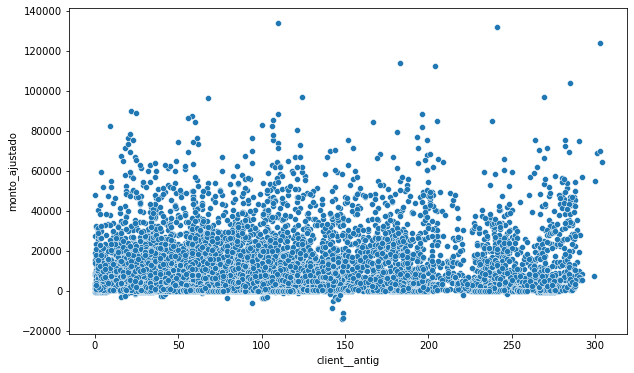

In [98]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='client__antig', y='monto_ajustado', palette="pastel")

Observamos que estas variables no tienen una relación concluyente. De igual forma, procedemos a instanciar un modelo de regresión polinomial para las mismas.

In [99]:
# Selección del feature antigüedad
X_train_antig = (X_train_r.loc[:, 'client__antig'].values.reshape(-1,1))
X_val_antig = (X_val_r.loc[:, 'client__antig'].values.reshape(-1,1))
X_train_antig.shape, X_val_antig.shape

((4377, 1), (1877, 1))

In [100]:
train_errors = []
valid_errors = []
degrees = [0,1,2,3,4,5,6,7,8,9,10,11,12]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_antig, y_train_r)
    
    # predict:
    y_train_pred = model.predict(X_train_antig)
    y_valid_pred = model.predict(X_val_antig)
    
    train_error = mean_squared_error(y_train_r, y_train_pred)
    valid_error = mean_squared_error(y_val_r, y_valid_pred)
    train_errors.append(train_error)
    valid_errors.append(valid_error)
    print(f'Grado {degree}: Train error {train_error.round(3)},Valid error {valid_error.round(3)}') 

Grado 0: Train error 230971749.155,Valid error 242936546.718
Grado 1: Train error 225538310.381,Valid error 240344045.195
Grado 2: Train error 225331669.433,Valid error 239699407.455
Grado 3: Train error 225324581.497,Valid error 239905570.511
Grado 4: Train error 224412585.343,Valid error 237526633.487
Grado 5: Train error 222620104.845,Valid error 237528725.061
Grado 6: Train error 222019216.034,Valid error 237106129.231
Grado 7: Train error 232499694.272,Valid error 247279026.305
Grado 8: Train error 239190790.851,Valid error 256137741.955
Grado 9: Train error 246529583.791,Valid error 268525909.033
Grado 10: Train error 268099680.304,Valid error 342481596.231
Grado 11: Train error 275218571.244,Valid error 398051016.523
Grado 12: Train error 282067735.291,Valid error 491098586.251


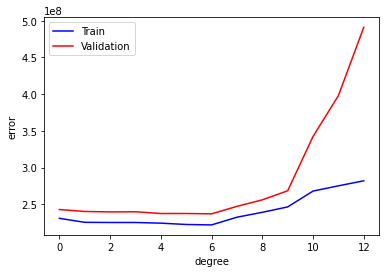

In [101]:
plt.plot(degrees, train_errors, color="blue", label="Train")
plt.plot(degrees, valid_errors, color="red", label="Validation")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Observamos que a partir del polinomio de grado 6, se agravan los errores de train y validación. 

In [102]:
# sin vector bais primero
degree = 6
pf = PolynomialFeatures(degree, include_bias=False)
lr = LinearRegression(fit_intercept=False)  
model = make_pipeline(pf, lr)

In [103]:
# Entrenamos el modelo
model.fit(X_train_antig, y_train_r)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=6, include_bias=False)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [104]:
# Vemos los parametros
lr.coef_ , lr.intercept_

(array([ 8.15971233e+02, -1.98337837e+01,  2.04032163e-01, -9.43517065e-04,
         1.84918550e-06, -1.06265119e-09]), 0.0)

In [105]:
x_start = min(np.min(X_train_antig), np.min(X_val_antig))
x_end = max(np.max(X_train_antig), np.max(X_val_antig))
x = np.linspace(x_start, x_end).reshape(-1)
x.shape

(50,)

In [106]:
# Predicción
y_predic_antig = model.predict(x.reshape(-1, 1))

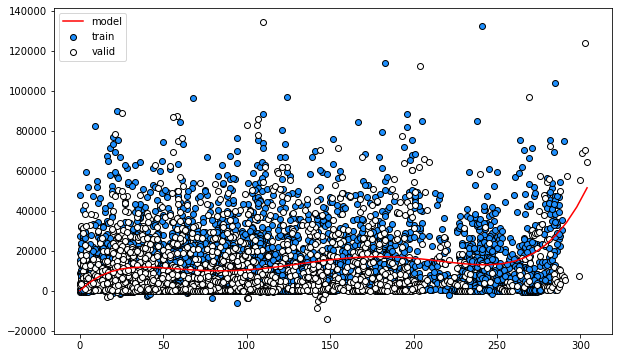

Train error: 222019216.034157
Valid error: 237106129.231279


In [107]:
plt.figure(figsize=(10,6))
plt.scatter(X_train_antig, y_train_r, color="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_val_antig, y_val_r, color="white", edgecolor="k", label="valid")
plt.plot(x, y_predic_antig, color="red", label="model") 
plt.legend()
plt.show()

print(f'Train error: {train_errors[degree]:f}')
print(f'Valid error: {valid_errors[degree]:f}')

#### Con vector de Bias

In [108]:
# con vector bias primero
degree = 6
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  
model = make_pipeline(pf, lr)

In [109]:
# Entrenamos el modelo
model.fit(X_train_antig, y_train_r)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [110]:
# Vemos los parametros
lr.coef_ , lr.intercept_

(array([ 1.12013234e+04, -1.34780661e+02,  6.00096901e+00, -1.08669281e-01,
         9.21717297e-04, -3.51358880e-06,  4.87004196e-09]), 0.0)

In [111]:
x_start = min(np.min(X_train_antig), np.min(X_val_antig))
x_end = max(np.max(X_train_antig), np.max(X_val_antig))
x = np.linspace(x_start, x_end).reshape(-1)
x.shape

(50,)

In [112]:
# Predicción
y_predic_antig_2 = model.predict(x.reshape(-1, 1))

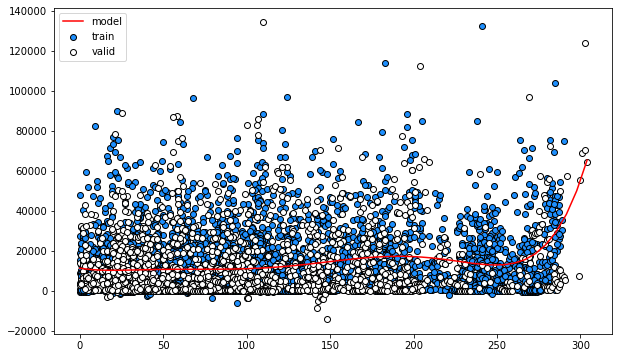

Train error: 222019216.034157
Valid error: 237106129.231279


In [113]:
plt.figure(figsize=(10,6))
plt.scatter(X_train_antig, y_train_r, color="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_val_antig, y_val_r, color="white", edgecolor="k", label="valid")
plt.plot(x, y_predic_antig_2, color="red", label="model") 
plt.legend()
plt.show()

print(f'Train error: {train_errors[degree]:f}')
print(f'Valid error: {valid_errors[degree]:f}')

### 3.2 Regresion polinomial con varias variables

In [114]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

In [119]:
from sklearn.compose import make_column_transformer

scaler = MaxAbsScaler() # Mantiene el signo y el 0
X_train_vs = scaler.fit_transform(X_train_r.drop(['dni_titular_movimiento'], axis=1))
X_val_vs = scaler.transform(X_val_r.drop(['dni_titular_movimiento'], axis=1))

y_train_vs = scaler.fit_transform(y_train_r.values.reshape(-1,1))
y_val_vs = scaler.transform(y_val_r.values.reshape(-1,1))

In [129]:
y_train_vs

array([[-3.57418818e-05],
       [-3.49089142e-05],
       [-3.37730493e-05],
       ...,
       [ 9.95918004e-02],
       [ 1.06866636e-01],
       [ 4.81913396e-02]])

In [126]:
train_errors_vs = []
valid_errors_vs = []
degrees = [1,2]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_vs, y_train_vs)
    
    # predict:
    y_train_pred = model.predict(X_train_vs)
    y_valid_pred = model.predict(X_val_vs)
    
    # evaluate:
    train_error = mean_squared_error(y_train_vs, y_train_pred)
    val_error = mean_squared_error(y_val_vs, y_valid_pred)
    train_errors_vs.append(train_error)
    valid_errors_vs.append(val_error)
    print(f'Grado {degree}: Train error {train_error.round(3)}, Valid error {val_error.round(3)}')  

Grado 1: Train error 0.006, Valid error 0.007
Grado 2: Train error 0.003, Valid error 7.25374800929696e+19


In [124]:
pd.DataFrame(y_val_vs, columns=['val_real']).describe().round(2)

,val_real
count,1877.00
mean,0.09
std,0.12
min,-0.11
25%,0.01
50%,0.04
75%,0.13
max,1.02


In [125]:
pd.DataFrame(y_valid_pred, columns=['val_pred']).describe().round(2)

,val_pred
count,1.877000e+03
mean,-2.929197e+08
std,8.514123e+09
min,-6.549109e+10
25%,1.000000e-02
50%,6.000000e-02
75%,1.400000e-01
max,4.487153e+10


In [ ]:
plt.plot(degrees, train_errors_vs, color="blue", label="Train")
plt.plot(degrees, valid_errors_vs, color="red", label="Validation")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Observamos que a partir del polinomio de grado 3 el modelo comienza a hacer overfiting, es decir si bien el error en train sigue disminuyendo no ocurre lo mismo con el error de validación, el cual se dispara. 

### 3.3 Elección del mejor modelo de Regresión 

Observamos que el modelo de regresión polinomial multivariado, nos permite obtener mejores resultados que el anterior. Esto es así, debido a que los features escogidos explican mejor el comportamiento de nuestra variable target. Por otro lado, se realizo un escalado previo al entrenamiento. 
Procedemos a evaluar con los datos de test. 

In [42]:
degree = 3
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  
model = make_pipeline(pf, lr)

In [122]:
# Entrenamos el modelo
model.fit(X_train_vs, y_train_r_esc)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [123]:
X_test_vs = scaler.fit_transform(X_test_r.loc[:, columnas ].values)
y_test_r_esc = scaler.fit_transform(y_reg_test.values.reshape(-1,1))
X_test_vs.shape , y_test_r_esc.shape

((771, 7), (771, 1))

In [124]:
# Predicción en test
y_train_pred = model.predict(X_train_vs)
y_valid_pred = model.predict(X_val_vs)
y_test_pred = model.predict(X_test_vs)

In [125]:
# testing:
train_error = mean_squared_error(y_train_r_esc, y_train_pred)
val_error = mean_squared_error(y_val_r_esc, y_valid_pred)
test_error = mean_squared_error(y_test_r_esc, y_test_pred)
print("Train error:", train_error.round(3), "Validation error:", val_error.round(3), "Test error:", test_error.round(3)) 

Train error: 0.005 Validation error: 33.364 Test error: 329.279


Observamos que el error en test es considerablemente más alto que el observado en las etapas de entrenamiento y validación. Sin embargo, es el mejor modelo que se puede instanciar con una regresión polinomial. 

## 4. Modelos de clasificación

### 4.1 Distribución de la variable target

In [178]:
y_train_c.value_counts()

0    2812
1    1626
Name: fg_aumentado, dtype: int64

La variable target no está balanceado, hay una relación de 2/1 en el conjunto de etiquetas de etiquetas. Esto nos da la pauta que a la métrica a la cual tenemos que darle más importancia es al F1-Score de la etiqueta 1, es decir queremos tener una buena Precisión y Recall para la etiqueta de menor cuantía. 

### 4.2 Modelos lineales de clasificación 

#### 4.2.1 Regresión Logistica

In [179]:
X_train_c.shape, y_train_c.shape

((4438, 26), (4438,))

In [188]:
num_cols = np.array(['antig_cliente'])
cat_cols = np.array(X_train_c.columns[4:])

In [189]:
X_train_lreg = X_train_c[np.concatenate((num_cols,cat_cols))]
X_val_lreg = X_val_c[np.concatenate((num_cols,cat_cols))]

pipe = Pipeline([('scaler', StandardScaler()), ('lreg', LogisticRegression(random_state=0))])

pipe.fit(X_train_lreg, y_train_c)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lreg', LogisticRegression(random_state=0))])

In [190]:
pipe['lreg'].classes_

array([0, 1])

In [191]:
pipe['lreg'].coef_

array([[-0.06013254, -0.15366412, -0.09109375, -0.0029165 ,  0.03199361,
         0.03426988,  0.06548672,  0.0260232 , -0.00218484, -0.12502322,
         0.03338826, -0.03771486,  0.10113351,  0.24656461,  0.04854482,
         0.06239834,  0.26103903, -0.02347546,  0.27888236,  0.20238223,
         0.27234575,  0.54157173,  0.04818402]])

In [192]:
pipe['lreg'].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [193]:
y_train_pred_lreg = pipe.predict(X_train_lreg)
y_val_pred_lreg = pipe.predict(X_val_lreg)

In [194]:
# Evaluar train
text = "Logistic Regression - Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train_c, y_train_pred_lreg))

Logistic Regression - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.69      0.88      0.77      2812
           1       0.61      0.33      0.43      1626

    accuracy                           0.68      4438
   macro avg       0.65      0.60      0.60      4438
weighted avg       0.66      0.68      0.65      4438



In [195]:
# Evaluar validacion
text = "Logistic Regression - Reporte de clasificación del conjunto de validacion" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_val_c, y_val_pred_lreg))

Logistic Regression - Reporte de clasificación del conjunto de validacion
              precision    recall  f1-score   support

           0       0.68      0.87      0.76      1178
           1       0.60      0.32      0.42       724

    accuracy                           0.66      1902
   macro avg       0.64      0.59      0.59      1902
weighted avg       0.65      0.66      0.63      1902



Text(0.5, 1.0, 'Regresión Logística - Matriz de confusión del conjunto de train sin normalizar\n')

<Figure size 432x288 with 0 Axes>

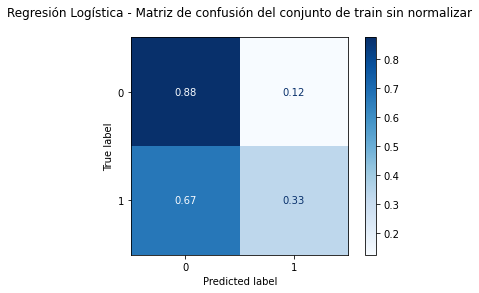

In [206]:
plt.figure()
plot_confusion_matrix(estimator=pipe, X=X_train_lreg, y_true=y_train_c,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('Regresión Logística - Matriz de confusión del conjunto de train sin normalizar\n')

Text(0.5, 1.0, 'Regresión Logística - Matriz de confusión del conjunto de train sin normalizar\n')

<Figure size 432x288 with 0 Axes>

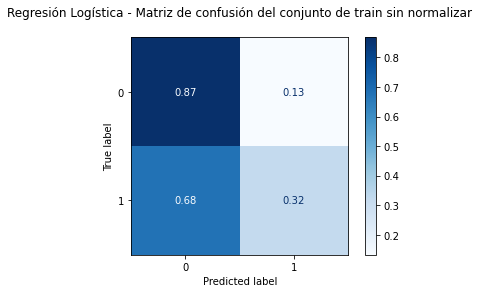

In [207]:
plt.figure()
plot_confusion_matrix(estimator=pipe, X=X_val_lreg, y_true=y_val_c,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('Regresión Logística - Matriz de confusión del conjunto de train sin normalizar\n')

Los resultados para el modelo de Regresión Logístico, no son del todo buenos, sin embargo nos da una primera referencia de métricas, para poder mejorar en los siguientes modelos. 
Sin bien se intento normalizar los features, la predicción no era buena (no predecia la etiqueta 0), por lo cual optamos por realizar un escalado de los datos utilizando StandardScaler. 

#### 4.2.2 SGDClassifier 

In [208]:
scaler = StandardScaler()
X_train_sgd = scaler.fit_transform(X_train_lreg)
X_val_sgd = scaler.fit_transform(X_val_lreg)
X_train_sgd.shape, X_val_sgd.shape

((4438, 23), (1902, 23))

In [209]:
param_grid = {
    'loss': ['hinge','log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'alpha': [0.001, 0.01, 0.1, 1],
    'penalty': ['l2','l1'],
    'eta0': [1e-3, 1e-4, 1e-5, 10],
    'learning_rate': ['optimal', 'constant', 'adaptive']
    #'max_iter': [1000, 2000, 5000]
}

model = SGDClassifier(random_state= 0, shuffle=False)
cv = GridSearchCV(model, param_grid, scoring='f1',cv=3)
cv.fit(X_train_sgd, y_train_c)
#cv.fit(X, y)

#results = cv.cv_results_
#params = results['params']

/Users/lucianomantovani/opt/miniconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/lucianomantovani/opt/miniconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/lucianomantovani/opt/miniconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/lucianomantovani/opt/miniconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: Converg

GridSearchCV(cv=3, estimator=SGDClassifier(random_state=0, shuffle=False),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1],
                         'eta0': [0.001, 0.0001, 1e-05, 10],
                         'learning_rate': ['optimal', 'constant', 'adaptive'],
                         'loss': ['hinge', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron'],
                         'penalty': ['l2', 'l1']},
             scoring='f1')

In [210]:
cv.best_estimator_

SGDClassifier(alpha=0.1, eta0=0.001, loss='squared_hinge', penalty='l1',
              random_state=0, shuffle=False)

In [211]:
clf_best = cv.best_estimator_
y_train_pred = clf_best.predict(X_train_sgd)
y_val_pred = clf_best.predict(X_val_sgd)

In [212]:
# Métricas en train
text = "SGDClassifier - Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train_c, y_train_pred))

SGDClassifier - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.73      0.58      0.65      2812
           1       0.46      0.62      0.53      1626

    accuracy                           0.60      4438
   macro avg       0.60      0.60      0.59      4438
weighted avg       0.63      0.60      0.61      4438



In [213]:
# Evaluar con datos de validación
text = "SGDClassifier - Reporte de clasificación del conjunto de validación" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_val_c, y_val_pred))

SGDClassifier - Reporte de clasificación del conjunto de validación
              precision    recall  f1-score   support

           0       0.69      0.65      0.67      1178
           1       0.48      0.53      0.50       724

    accuracy                           0.60      1902
   macro avg       0.58      0.59      0.59      1902
weighted avg       0.61      0.60      0.60      1902



Observamos que las métricas obtenidas son mejores para el caso de la regresión logística, con parámetros por defecto calculada en primer instancia. A continuación, probaremos un modelo de clasificación no lineal, el árbol de decisión. 

Text(0.5, 1.0, 'SGD - Matriz de confusión del conjunto de train')

<Figure size 432x288 with 0 Axes>

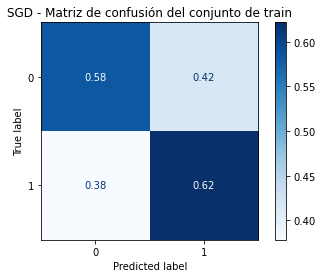

In [214]:
plt.figure()
plot_confusion_matrix(estimator=clf_best, X=X_train_sgd, y_true=y_train_c,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('SGD - Matriz de confusión del conjunto de train')

Text(0.5, 1.0, 'SGD - Matriz de confusión del conjunto de train sin normalizar\n')

<Figure size 432x288 with 0 Axes>

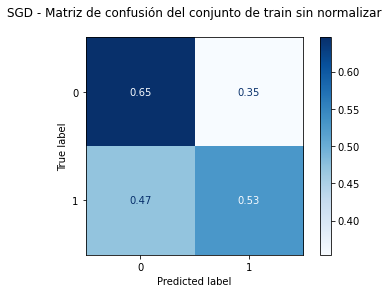

In [215]:
plt.figure()
plot_confusion_matrix(estimator=clf_best, X=X_val_sgd, y_true=y_val_c,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('SGD - Matriz de confusión del conjunto de train sin normalizar\n')

### 4.3 Modelos no lineales de clasificación: Árboles de decisión 

In [216]:
X_train_tree = X_train_sgd
X_val_tree = X_val_sgd

In [224]:
param_grid = {
    'max_depth': [10, 15, 20, 25, 30],
    'criterion':['gini', 'entropy'],
    'min_samples_split': [3,5, 10, 15, 20, 25,30],
    'min_samples_leaf':[2, 4, 5, 6, 8, 10]}

model_tree = DecisionTreeClassifier(random_state= 0)
cv_tree = GridSearchCV(model_tree, param_grid, scoring='f1', cv=5)
cv_tree.fit(X_train_tree, y_train_c)
#cv.fit(X, y)

#results_tree = cv.cv_results_
#params_tree = results_tree['params']

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_leaf': [2, 4, 5, 6, 8, 10],
                         'min_samples_split': [3, 5, 10, 15, 20, 25, 30]},
             scoring='f1')

In [227]:
cv_tree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=3, random_state=0)

In [226]:
clf_best_tree = cv_tree.best_estimator_
y_train_pred_tree = clf_best_tree.predict(X_train_tree)
y_val_pred_tree = clf_best_tree.predict(X_val_tree)

In [222]:
# Métricas en train
text = "Árbol - Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train_c, y_train_pred_tree))

Árbol - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      2812
           1       0.63      0.49      0.55      1626

    accuracy                           0.71      4438
   macro avg       0.68      0.66      0.67      4438
weighted avg       0.70      0.71      0.70      4438



In [223]:
# Métricas en validación
text = "Árbol - Reporte de clasificación del conjunto de validación" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_val_c, y_val_pred_tree))

Árbol - Reporte de clasificación del conjunto de validación
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      1178
           1       0.56      0.53      0.55       724

    accuracy                           0.66      1902
   macro avg       0.64      0.64      0.64      1902
weighted avg       0.66      0.66      0.66      1902



En una primera instancia se creo un modelo de árbol de decisión con parametros por defecto, el cual llegaba a una profundidad de 33, realizando overfiting sobre el conjunto de entrenamiento. Sin embargo, esto nos permitió en primer lugar, comprobar que con estos datos es posible la predicción de la variable objetivo utilizando este modelo y por otro lado, tener una serie de parémetros de referencia para poder encontrar el mejor árbol. 

Se observa que se logran mejores resultados en f1-score con un árbol de decisión, en comparación con los modelos lineales instanciados en el apartado anterior.

Text(0.5, 1.0, 'Árbol - Matriz de confusión del conjunto de train')

<Figure size 432x288 with 0 Axes>

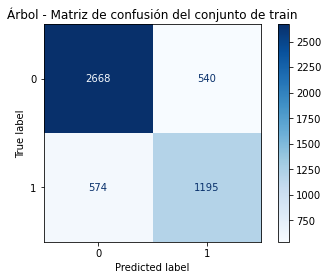

In [73]:
plt.figure()
plot_confusion_matrix(estimator=clf_best_tree, X=X_train_tree, y_true=y_train_c,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('Árbol - Matriz de confusión del conjunto de train')

Text(0.5, 1.0, 'Árbol - Matriz de confusión del conjunto de train sin normalizar\n')

<Figure size 432x288 with 0 Axes>

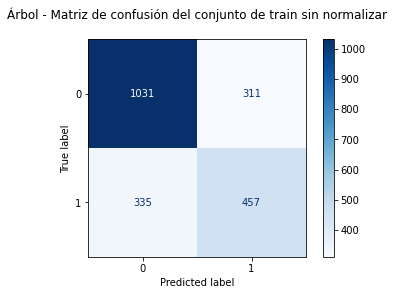

In [74]:
plt.figure()
plot_confusion_matrix(estimator=clf_best_tree, X=X_val_tree, y_true=y_val_c,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('Árbol - Matriz de confusión del conjunto de train sin normalizar\n')

### 4.4 Elección del mejor modelo de Clasificación

In [75]:
X_test_c = X_test_c[np.concatenate((num_cols,cat_cols))]
X_test_c = scaler.fit_transform(X_test_c)

In [76]:
# Entrenamos el modelo
clf_best_tree.fit(X_train_tree, y_train_c)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=20, random_state=0)

In [77]:
# Predicción en val y test
y_train_pred_tree = clf_best_tree.predict(X_train_tree)
y_val_pred_tree = clf_best_tree.predict(X_val_tree)
y_test_pred_tree = clf_best_tree.predict(X_test_c)

In [78]:
# Métricas en train
text = "Árbol - Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train_c, y_train_pred_tree))

Árbol - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      3208
           1       0.69      0.68      0.68      1769

    accuracy                           0.78      4977
   macro avg       0.76      0.75      0.75      4977
weighted avg       0.78      0.78      0.78      4977



In [79]:
# Métricas en validación
text = "Árbol - Reporte de clasificación del conjunto de validación" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_val_c, y_val_pred_tree))

Árbol - Reporte de clasificación del conjunto de validación
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1342
           1       0.60      0.58      0.59       792

    accuracy                           0.70      2134
   macro avg       0.67      0.67      0.67      2134
weighted avg       0.70      0.70      0.70      2134



In [80]:
# Métricas en test
text = "Árbol - Reporte de clasificación del conjunto de validación" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_cla_test, y_test_pred_tree))

Árbol - Reporte de clasificación del conjunto de validación
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       337
           1       0.36      0.61      0.45        66

    accuracy                           0.76       403
   macro avg       0.64      0.70      0.65       403
weighted avg       0.82      0.76      0.78       403



Text(0.5, 1.0, 'Árbol - Matriz de confusión del conjunto de test')

<Figure size 432x288 with 0 Axes>

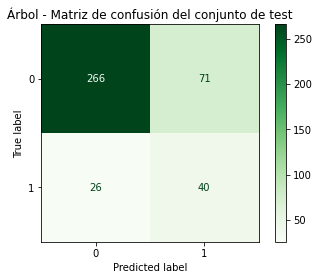

In [81]:
plt.figure()
plot_confusion_matrix(estimator=clf_best_tree, X=X_test_c, y_true=y_cla_test,
                      normalize='true', cmap='Greens').ax_ \
                      .set_title('Árbol - Matriz de confusión del conjunto de test')